# Project-->Customer Segmentation

In this project, i will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

## Read Data 

In [288]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
import visuals as vs
#to see graphs in the same jupyter notebook
%matplotlib inline
customer = pd.read_csv('customers.csv')
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Dropping the features of channel and region in order to focus the product analysis

In [289]:
customer.drop(['Region', 'Channel'], axis = 1, inplace = True)
customer.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Explore Data

In [290]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


No null values

In [291]:
customer.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


There are 440 entries in the dataset, representing different customers or transactions
#### Mean
- The mean values give you an idea of the central tendency of each product category.
- Fresh' has a mean of approximately 12,000, indicating a relatively high average spending on fresh products
#### Standard Deviation (Std)
- Higher standard deviations suggest greater variability in spending across different customers.
high standard deviations across all product categories except *frozen* suggest that customer spending varies significantly, highlighting diverse preferences and purchasing behaviors across different segments of the customer base.

In [292]:
customer.shape

(440, 6)

Sample selection - few sample data points and explore them in more detail.

In [293]:
indices = [3, 33, 333]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(customer.loc[indices], columns = customer.keys()).reset_index(drop = True)
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,13265,1196,4221,6404,507,1788
1,29729,4786,7326,6130,361,1083
2,8565,4980,67298,131,38102,1215


Checking the z score of the selected random samples

<Axes: >

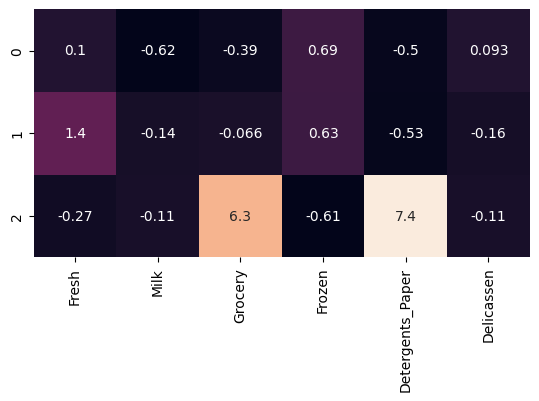

In [294]:
import seaborn as sns

sns.heatmap((samples-customer.mean())/customer.std(ddof=0), annot=True, cbar=False, square=True)

**Concept behind Z Score**
- Z-scores help identify outliers in your samples. Data points with high positive or negative Z-scores (far from zero) may be considered outliers, suggesting that they significantly deviate from the mean of the dataset
- Z-score close to zero means that the spending is close to the average spending level in the dataset.
- positive Z-score means above-average spending.
- negative Z-score means below-average spending.

### Heat Map Analysis

- **Sample 0** consumption of delicassen and fresh are close the population mean , for those products variation is low.
- **Sample 1** consumption of milk, grocery and delicassen products are close to the mean of its population. Moreover, `Fresh` is way above the mean w.r.t other products and has variance than other products
- **Sample 2** represents a factory that uses detergents and/or paper products majorly. Moreover, it has a very high requirement of groceries as well. And if we see the heatmap we can see that Sample 2 is very different from Sample 0 and 1 specially in terms of `Grocery` and `Detergents_Paper`.

### Plotting Data 

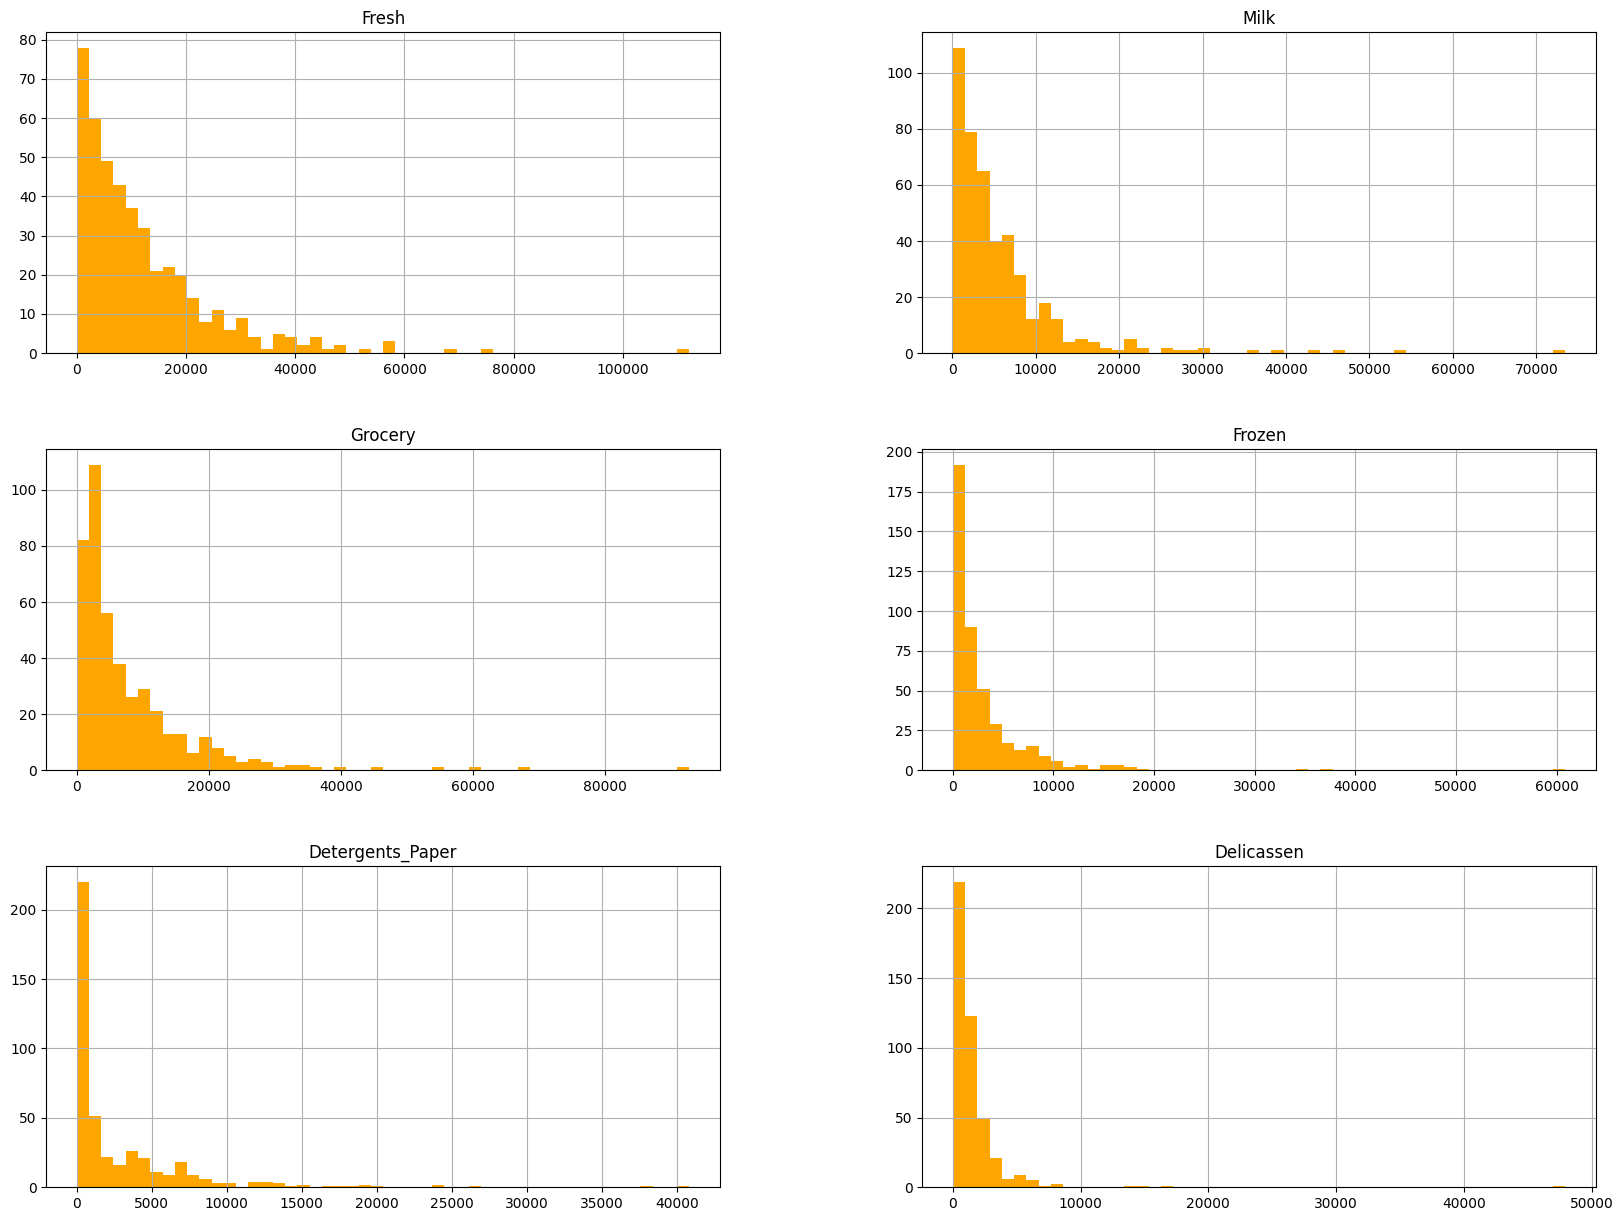

In [295]:
import matplotlib.pyplot as plt 

customer.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

### Pearson corelation test to capture the feature relevance

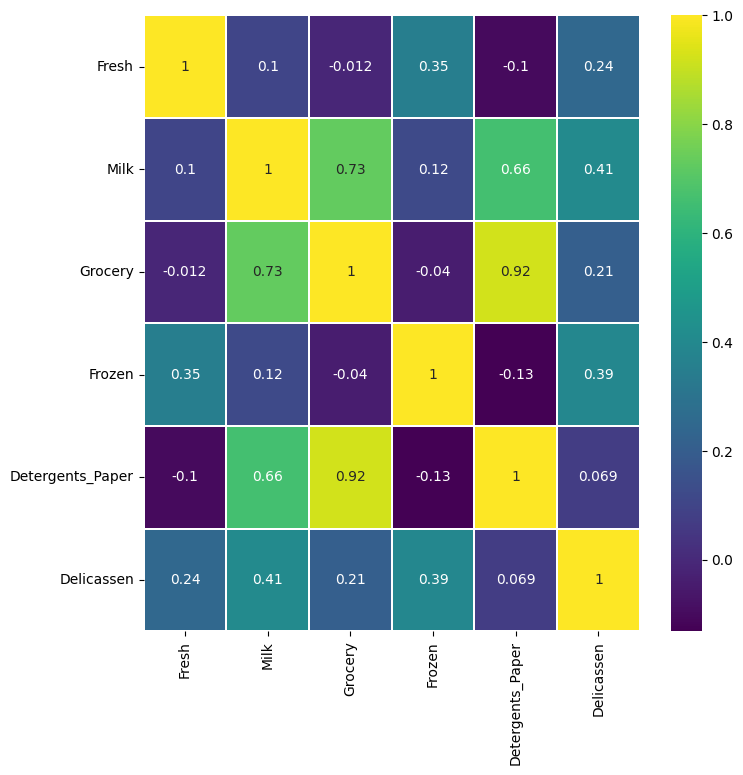

In [296]:
sns.heatmap(customer.corr(), annot=True, linewidth=0.2, annot_kws={"size":10}, cmap="viridis")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Observation**
- The pairs *Milk-Grocery* , *Grocery-Detergents_Paper* and *Detergents_Paper-Milk* show positive correlation and they are higly corelated.
- And as for the feature selected above (*Grocery*) shows some degree of positive correlation with all the other features(except frozen and fresh). This confirms the suspicions to some extent about the relevance of the feature which I tried to predict, since *Grocery* shows a correlation with other features except *Frozen* and *Fresh* but this corelation is not a tight one.
- features are positively skewed as well looking at the plots.

# Data Preprocessing

## Feature Scaling

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most to apply non-linear scaling particularly for financial data. One way to achieve this scaling is by using Box-Cox Transform or else we can use natural logarithm. Let me test both ways.

#### Natural Logarithm

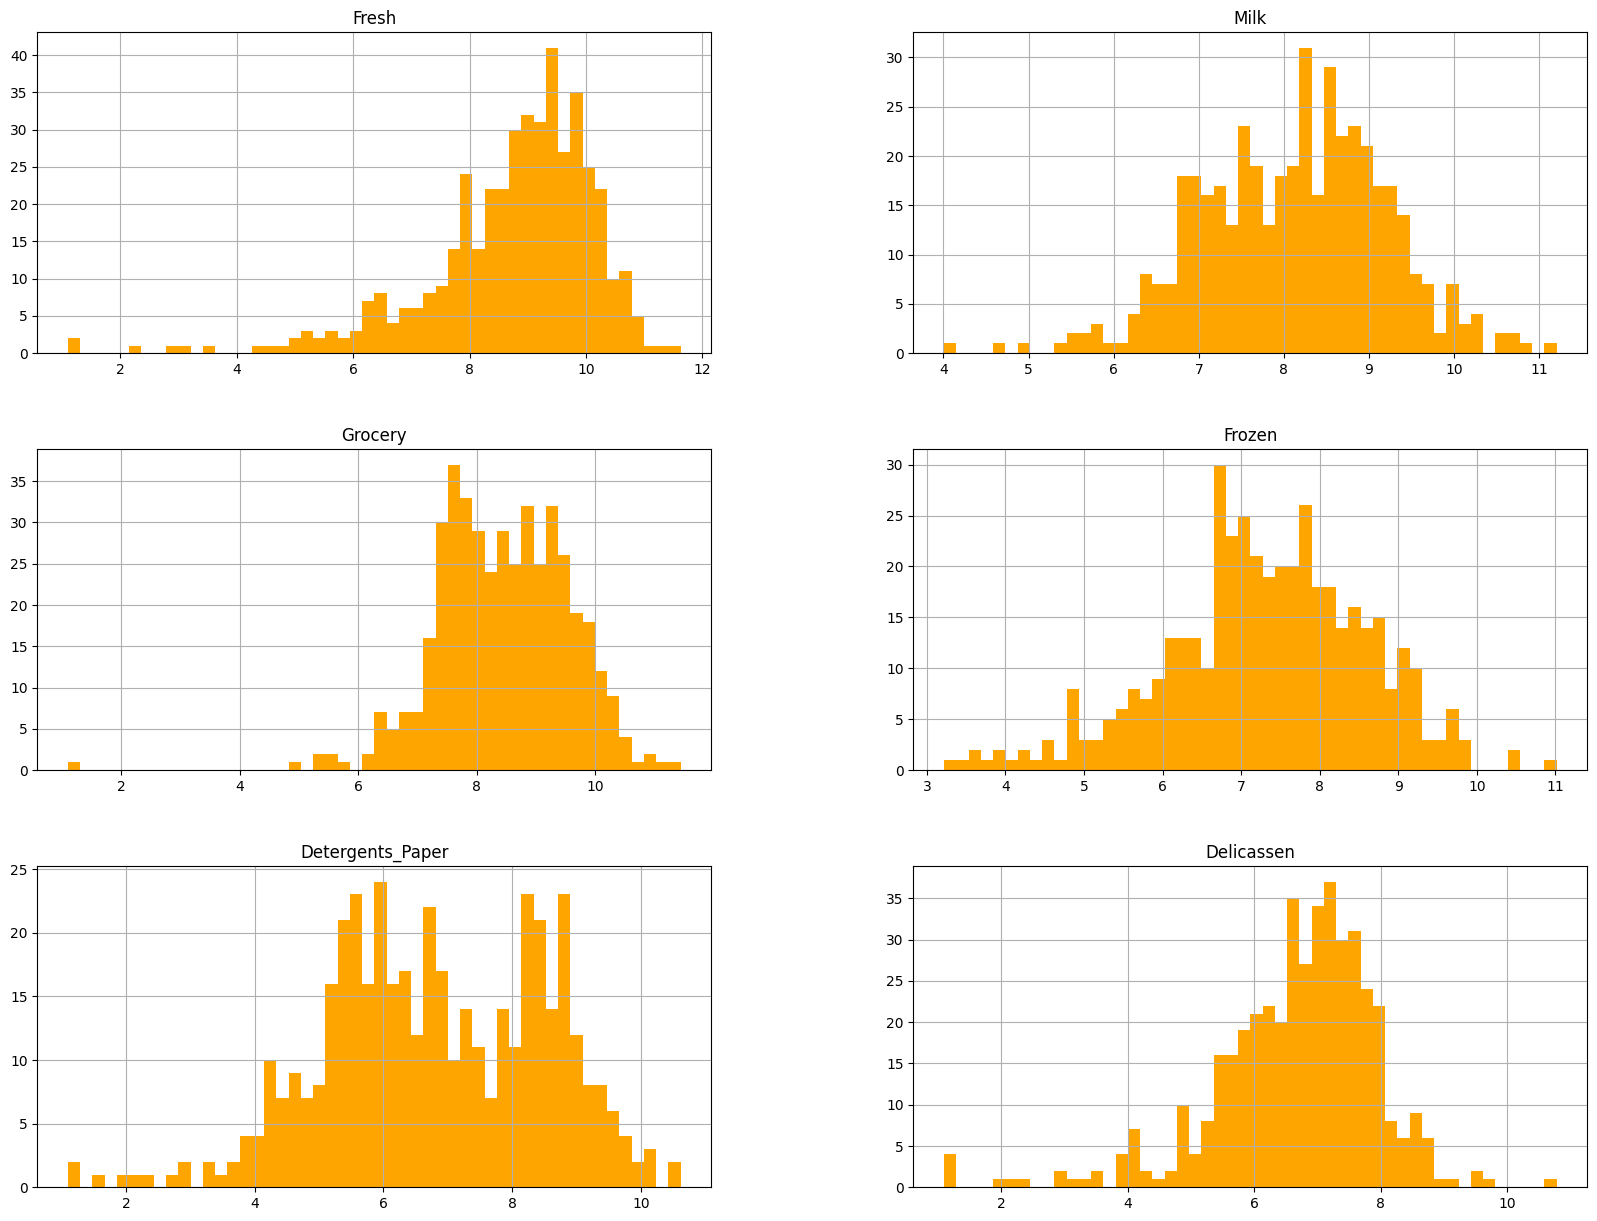

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [297]:
#Scale the data using the natural logarithm
log_data = np.log(customer)

#Scale the sample data using the natural logarithm
log_samples = np.log(samples)

log_data.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

display(log_data)

Here these values are monetary units, therfore we can use natural logarithms since all are positive values, But for own understanding im going to test box-cox (power transform) on this problem as well.

#### Box-Cox Transform

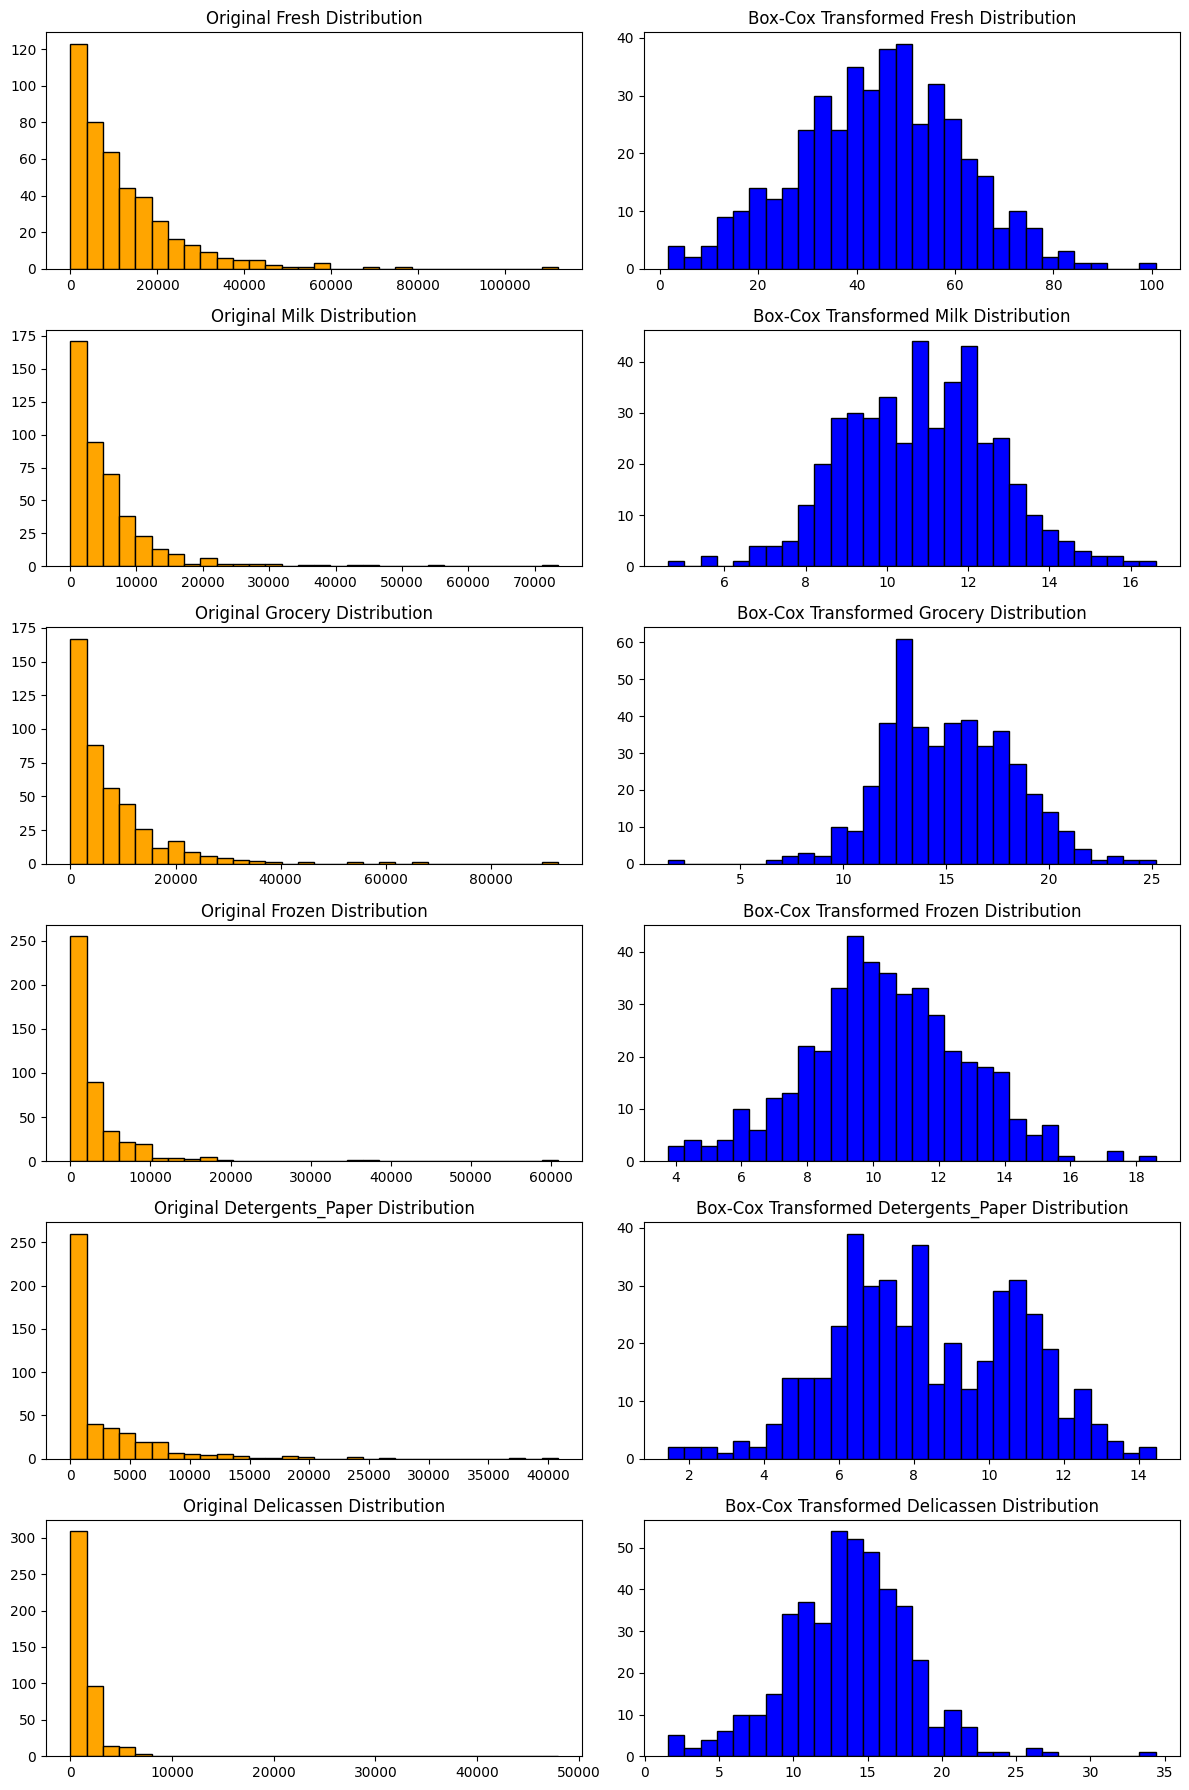

In [298]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Function to apply Box-Cox transform to a column and return the transformed column
def apply_boxcox(column):
    transformed_data, lam = boxcox(column + 1)  # Adding 1 to handle zero values
    return transformed_data, lam

columns_to_transform = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Apply Box-Cox transform
for a in columns_to_transform:
    transformed_data, lam = apply_boxcox(customer[a])
    customer[a + '_boxcox'] = transformed_data

# Original and transformed distributions for the specified columns
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 3 * 6))

for i, column in enumerate(columns_to_transform):
    axes[i, 0].hist(customer[column], bins=30, edgecolor='black', color='orange')
    axes[i, 0].set_title(f'Original {column} Distribution')

    axes[i, 1].hist(customer[column + '_boxcox'], bins=30, edgecolor='black', color='blue')
    axes[i, 1].set_title(f'Box-Cox Transformed {column} Distribution')

plt.tight_layout()
plt.show()


Box-Cox Transformed data in a pd dataframe

In [299]:
transformed_df = pd.DataFrame()

for a in columns_to_transform:
    transformed_data, lam = apply_boxcox(customer[a])
    transformed_df[a] = transformed_data

display(transformed_df)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,51.417803,12.627966,16.321114,6.865346,9.898261,15.099508
1,42.744825,12.657043,17.042362,10.573007,10.222421,16.203524
2,41.339338,12.459656,16.369883,11.181489,10.325210,23.048894
3,52.164618,9.046366,14.623169,13.209915,7.440912,16.230491
4,61.612680,11.584136,16.173020,12.168787,9.272923,20.947768
...,...,...,...,...,...,...
435,67.045314,13.037918,18.698220,14.813103,6.039063,17.085180
436,73.055859,9.334791,10.297295,12.463501,5.166199,17.346803
437,53.675704,13.509508,20.887195,8.043217,12.681387,16.404436
438,48.162513,9.866602,12.902328,9.575766,5.933083,16.933630


In [300]:
transformed_df = pd.DataFrame()

# Dictionary to store lambda values for each feature
lambda_values = {}

for a in columns_to_transform:
    transformed_data, lam = apply_boxcox(customer[a])
    transformed_df[a] = transformed_data
    lambda_values[a] = lam

print("Lambda values:", lambda_values)


Lambda values: {'Fresh': 0.29439123289326263, 'Milk': 0.06626945774945416, 'Grocery': 0.12374213312064684, 'Frozen': 0.08797998133217468, 'Detergents_Paper': 0.055398831547407816, 'Delicassen': 0.18541105095517926}


Compared to both transforms i take box-cox transform other than the natural logartithms because it shows greater results than the logarithmic transforma at the moment

### Outlier Detection and Removal (IQR method)

In [301]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in transformed_df.keys():
    
    Q1 = transformed_df[feature].quantile(0.25)
    Q3 = transformed_df[feature].quantile(0.75)
    step = 1.5 * (Q3 - Q1)

    print("Data points considered outliers for the feature '{}':".format(feature))
    display(transformed_df[~((transformed_df[feature] >= Q1 - step) & (transformed_df[feature] <= Q3 + step))])
    outliers.extend(transformed_df[(transformed_df[feature] < Q1 - step) | (transformed_df[feature] > Q3 + step)].index)
    
    print(outliers)
outliers = list(set(outliers))

# Remove the outliers, if any
good_data = transformed_df.drop(outliers).reset_index(drop=True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
181,100.761498,14.76556,19.113231,15.378356,10.867284,23.506973


[181]
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,61.873751,16.618353,21.103165,9.483237,13.199558,13.659899
154,19.184406,4.613351,6.787467,5.271355,2.203951,2.712296


[181, 86, 154]
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,59.667840,8.965652,1.51230,12.415125,1.440917,13.932553
85,55.442886,15.657509,25.19738,9.554374,14.453398,18.324200


[181, 86, 154, 75, 85]
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,37.260258,13.538785,18.836661,4.134632,11.418056,11.236267
57,39.289075,12.679961,17.329078,4.322876,11.556889,14.937822
65,9.209079,14.088584,22.416011,4.250378,13.527428,15.334702
93,49.622643,10.612485,12.697724,17.171156,4.825781,17.943701
145,61.120810,12.369743,21.393847,4.458229,12.402763,20.190440
183,71.659494,15.556079,19.471022,17.278407,6.403664,34.392025
325,69.078250,13.662209,18.165813,18.594195,8.771825,21.334398
420,36.904667,11.536499,18.069472,3.773066,11.385366,15.253031


[181, 86, 154, 75, 85, 38, 57, 65, 93, 145, 183, 325, 420]
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


[181, 86, 154, 75, 85, 38, 57, 65, 93, 145, 183, 325, 420]
Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,64.622213,15.176945,19.771672,12.744929,10.656949,27.261568
71,57.675907,9.137442,19.615693,12.833348,10.595723,26.468937
87,75.292533,11.453984,16.536293,13.178652,9.094791,26.419378
109,25.304707,13.655956,20.735425,8.793363,8.155937,1.580755
128,11.184129,12.467723,14.346692,6.222835,8.505270,1.580755
142,71.772624,12.082081,16.586955,11.620774,3.316336,1.580755
154,19.184406,4.613351,6.787467,5.271355,2.203951,2.712296
183,71.659494,15.556079,19.471022,17.278407,6.403664,34.392025
184,15.298197,8.627318,14.933163,5.251978,6.859663,3.156389
187,30.350580,12.285023,17.122987,13.163897,10.299536,1.580755


[181, 86, 154, 75, 85, 38, 57, 65, 93, 145, 183, 325, 420, 23, 71, 87, 109, 128, 142, 154, 183, 184, 187, 233]


In [302]:
good_data.shape

(418, 6)

- Good Data Plots

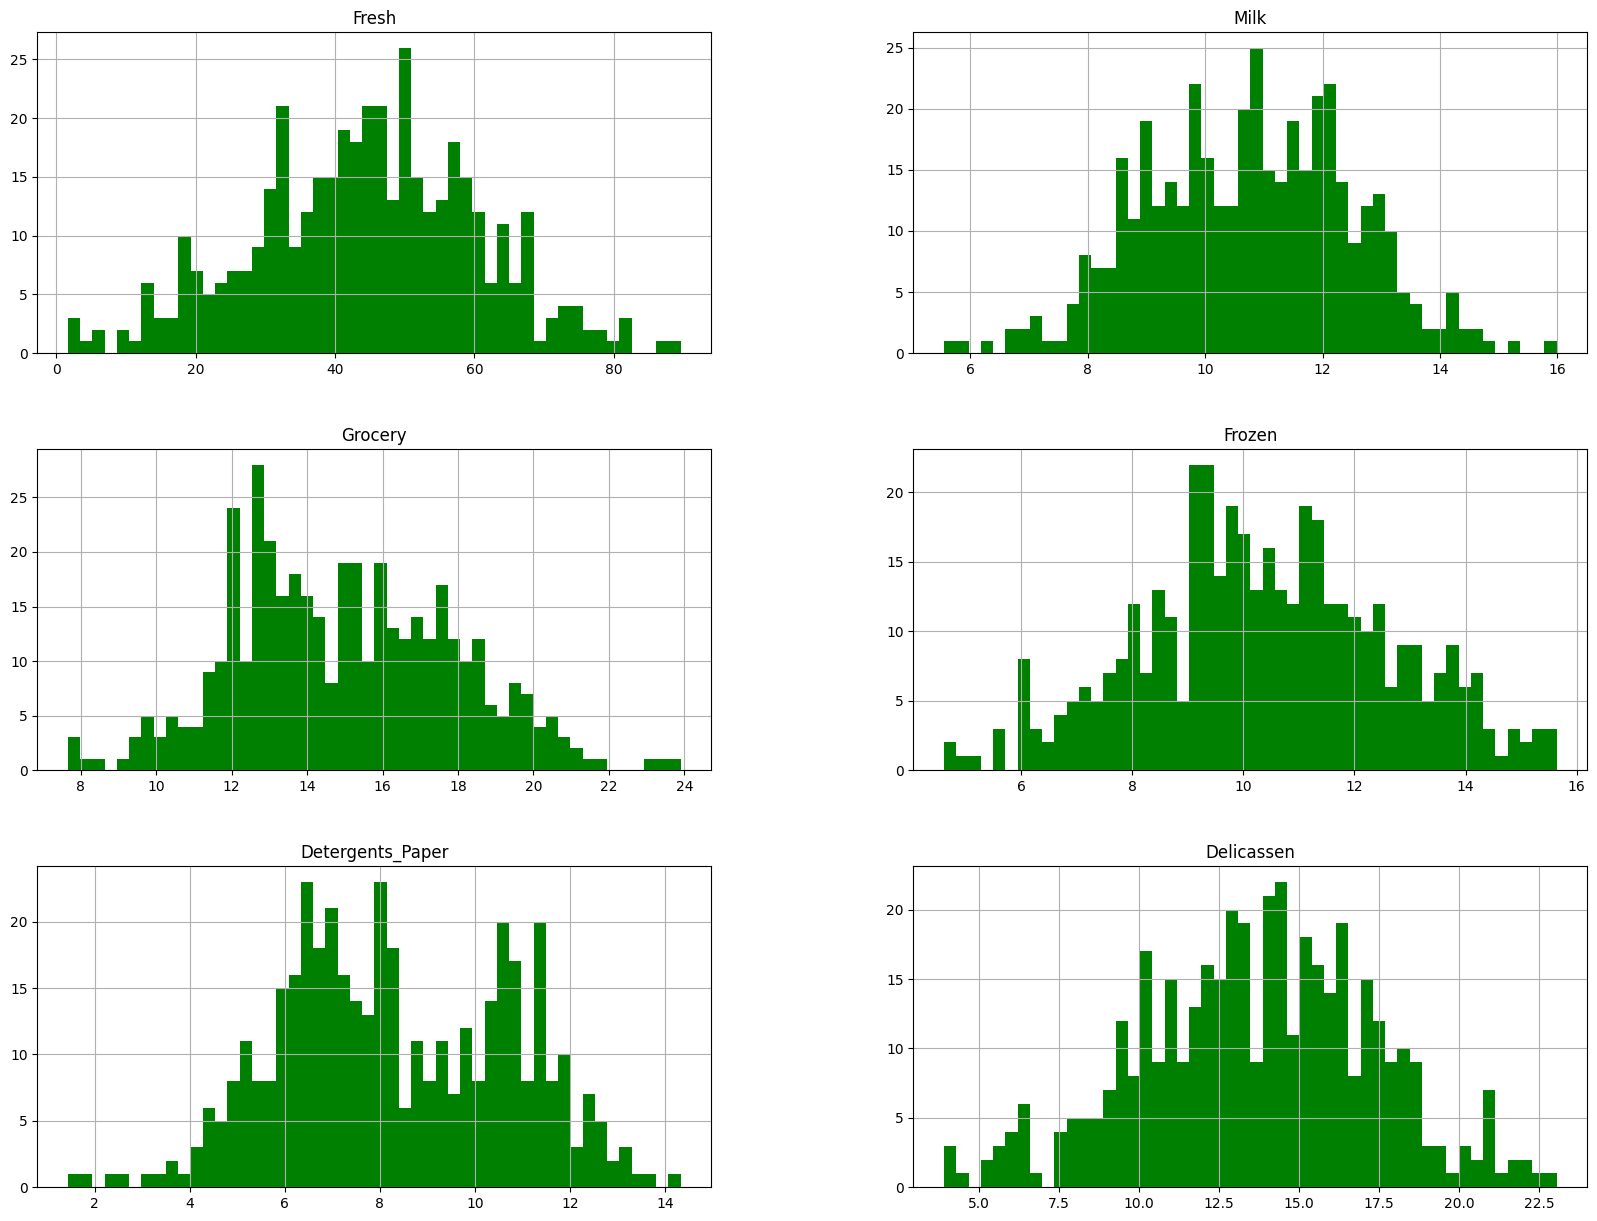

In [303]:
import matplotlib.pyplot as plt 

good_data.hist(bins=50, figsize=(20,15), color = "Green")
plt.show()

Comparing corelation matrix with original data vs transformed data

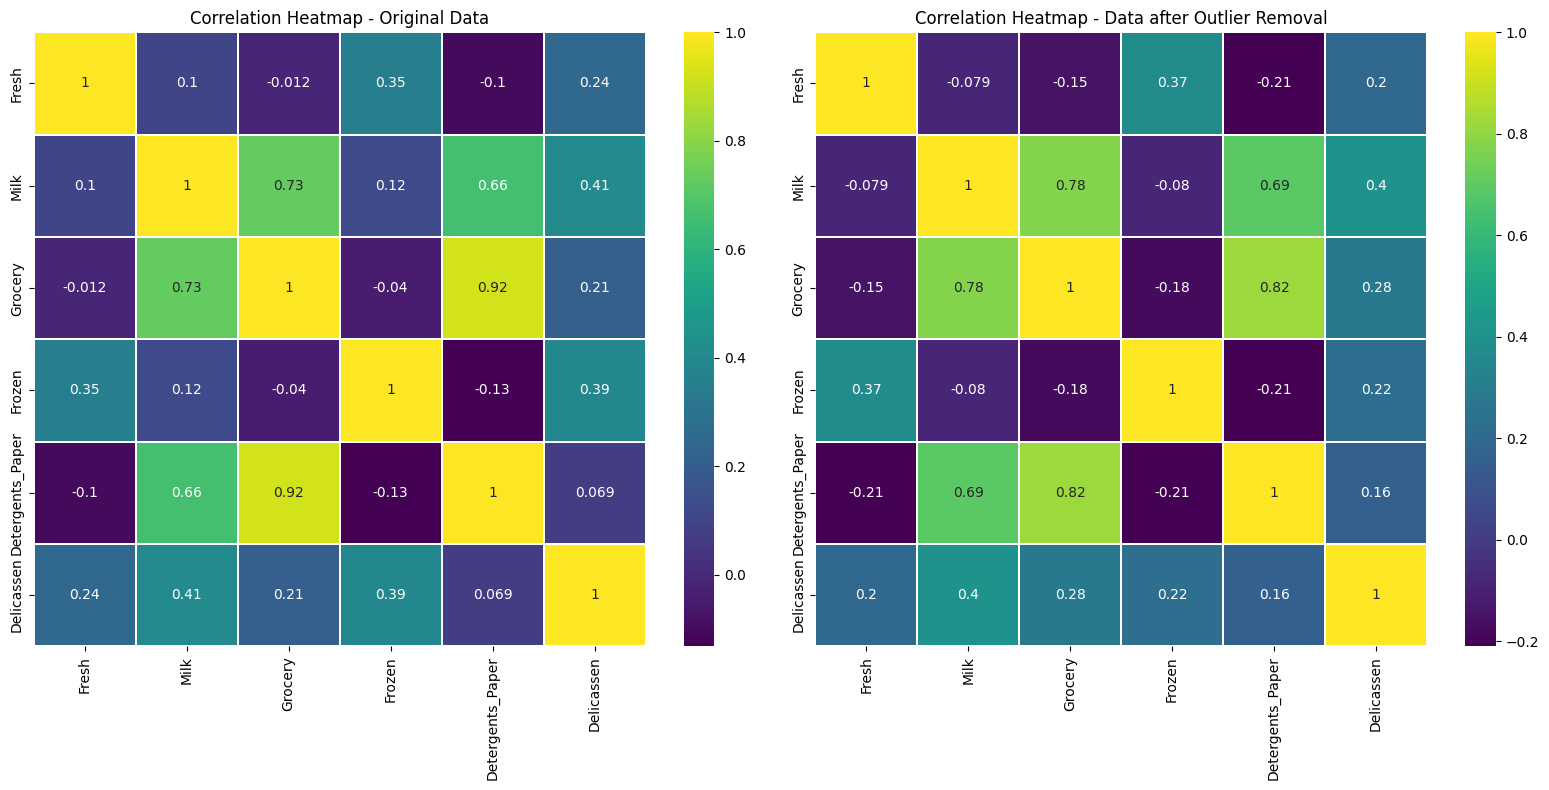

In [304]:
customer.drop(['Fresh_boxcox', 'Milk_boxcox','Grocery_boxcox' ,'Frozen_boxcox','Detergents_Paper_boxcox','Delicassen_boxcox'], axis = 1, inplace = True)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first heatmap
sns.heatmap(customer.corr(), annot=True, linewidth=0.2, annot_kws={"size": 10}, cmap="viridis", ax=axes[0])
axes[0].set_title('Correlation Heatmap - Original Data')
axes[0].tick_params(axis='both', labelsize=10)

# Plot the second heatmap
sns.heatmap(good_data.corr(), annot=True, linewidth=0.2, annot_kws={"size": 10}, cmap="viridis", ax=axes[1])
axes[1].set_title('Correlation Heatmap - Data after Outlier Removal')
axes[1].tick_params(axis='both', labelsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

#### Observation of Heatmap
- Based on the comparison between the original data and the transformed data, I can determine which correlations have increased and which have decreased. This helps identify a clear pattern in the data, which is crucial for the model.

## Feature Transformation

Principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### PCA implementation

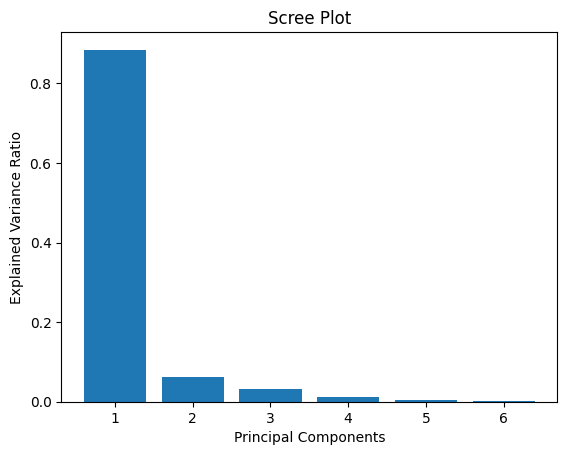

In [305]:
# Importing PCA
from sklearn.decomposition import PCA

#Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)
#Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Scree plot using explained variance ratio
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

### Observation
- This says all about the principal components , 1st and 2nd components explained the maximum variance in the 6 features.
- Lets check how the samples behave 

In [306]:
display(pd.DataFrame(np.round(pca_samples, 4), columns=[f'Dimension {i}' for i in range(1, pca.n_components_ + 1)]))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-34.8929,-9.8635,-2.0041,0.3592,-2.0415,-0.1484
1,-34.1315,-9.5434,-1.2582,0.2079,-1.0921,-1.1896
2,-35.7847,-6.3095,2.5189,3.0551,-3.6695,-0.3114


In [307]:
pca = PCA(n_components=2).fit(good_data)
reduced_data = pca.transform(good_data)

reduced_data_df = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])
display(reduced_data_df)

,Dimension 1,Dimension 2
0,6.739564,2.956190
1,-1.687466,4.177010
2,-2.722824,8.115200
3,8.032949,0.519921
4,17.483798,6.014066
...,...,...
413,22.878647,4.175766
414,29.059007,-1.981256
415,8.883317,7.801099
416,3.974872,-0.357740


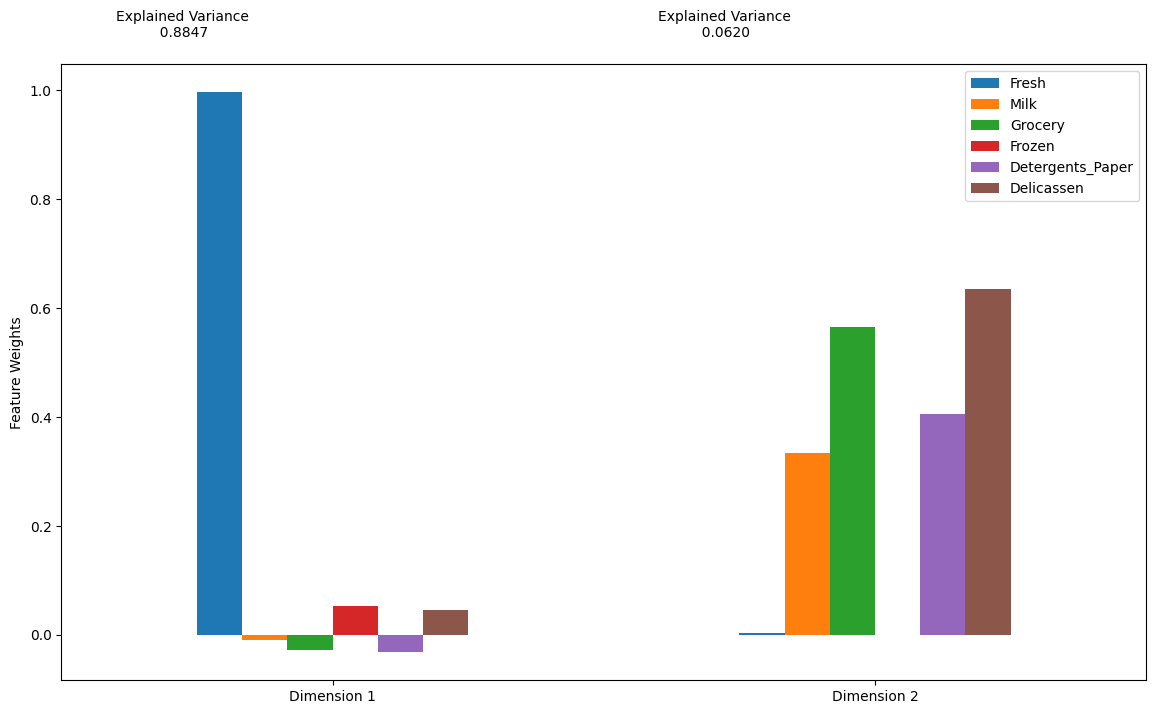

In [308]:
pca_results = vs.pca_results(good_data, pca)

### Obersavation on log sampled data 

In [309]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-34.8929,-9.8635
1,-34.1315,-9.5434
2,-35.7847,-6.3095


## Creating a Biplot

A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

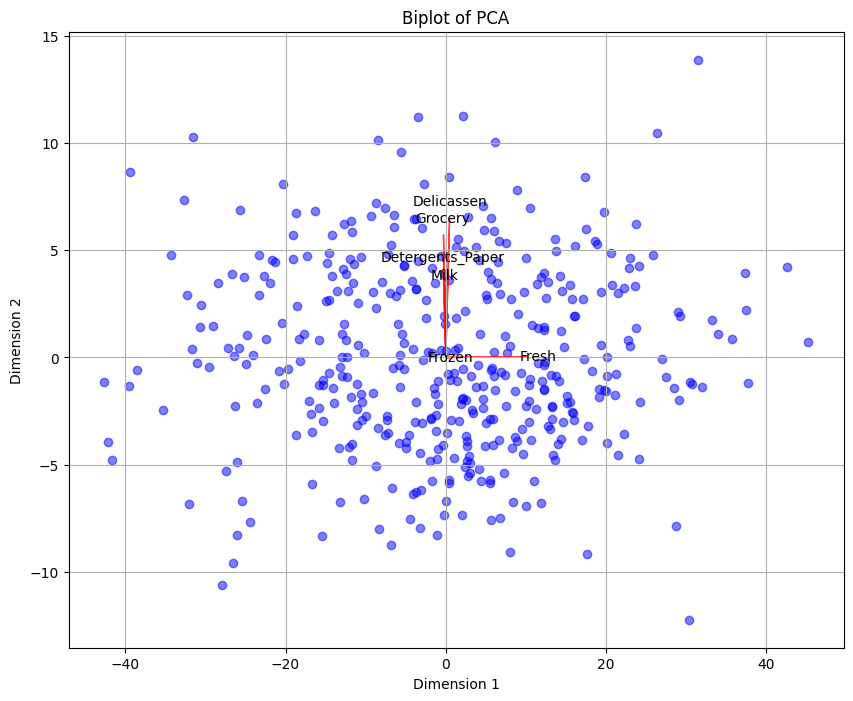

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(good_data)
reduced_data = pca.transform(good_data)

reduced_data_df = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])

features_df = pd.DataFrame(np.round(pca.components_, 4), columns=good_data.columns)

# Set up the biplot
plt.figure(figsize=(10, 8))

# Scatter plot of the reduced data
plt.scatter(reduced_data_df['Dimension 1'], reduced_data_df['Dimension 2'], c='blue', alpha=0.5)

# Plot feature vectors as arrows
feature_vectors_scale = 10
for i, feature in enumerate(features_df.columns):
    plt.arrow(0, 0, feature_vectors_scale * features_df.loc[0, feature], feature_vectors_scale * features_df.loc[1, feature],
              color='red', width=0.005, head_width=0.05, alpha=0.75)
    plt.text(feature_vectors_scale * features_df.loc[0, feature] * 1.15,
             feature_vectors_scale * features_df.loc[1, feature] * 1.15, feature, color='black', ha='center', va='center')

# Set axis labels
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Biplot of PCA')

# Display the biplot
plt.grid()
plt.show()


- Zoom in the plot

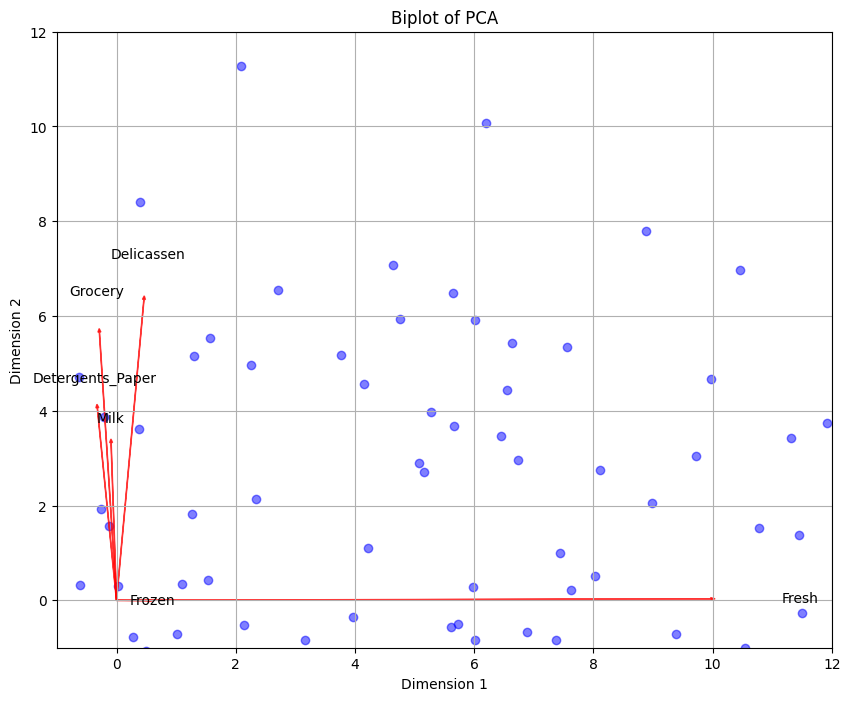

In [311]:
plt.figure(figsize=(10, 8))

plt.scatter(reduced_data_df['Dimension 1'], reduced_data_df['Dimension 2'], c='blue', alpha=0.5)

feature_vectors_scale = 10
for i, feature in enumerate(features_df.columns):
    plt.arrow(0, 0, feature_vectors_scale * features_df.loc[0, feature], feature_vectors_scale * features_df.loc[1, feature],
              color='red', width=0.005, head_width=0.05, alpha=0.75)
    plt.text(feature_vectors_scale * features_df.loc[0, feature] * 1.15,
             feature_vectors_scale * features_df.loc[1, feature] * 1.15, feature, color='black', ha='center', va='center')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Biplot of PCA')

# Set the zoomed-in limits
plt.xlim(-1, 12)
plt.ylim(-1, 12)

plt.grid()
plt.show()


# Clustering

K-Means clustering algorithm to identify the various customer segments hidden in the data, then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale.

In [312]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, n_init = 25, random_state = 1234)

In [313]:
km.fit(reduced_data_df)

KMeans(n_clusters=4, n_init=25, random_state=1234)

In [314]:
km.labels_

array([0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0, 3, 1, 2, 0, 0, 1,
       2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 3, 3, 2, 0, 2, 2, 2, 0, 3, 0, 1,
       1, 2, 0, 1, 1, 1, 2, 3, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 3, 2, 1, 0,
       0, 1, 2, 0, 3, 0, 0, 1, 0, 3, 0, 2, 0, 0, 2, 0, 0, 0, 1, 3, 3, 3,
       3, 0, 0, 3, 1, 2, 0, 0, 3, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 1, 2, 0, 3, 0, 1, 1, 1, 0, 1, 3, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 2, 0, 0, 1, 0, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0,
       0, 2, 1, 0, 0, 1, 1, 2, 3, 1, 3, 1, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 3, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 1, 3, 1, 3, 2, 0, 0, 1, 1, 3, 2, 3, 3, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 3, 0, 1, 1, 1, 3, 3,
       1, 0, 0, 3, 0, 2, 1, 0, 0, 3, 0, 3, 0, 0, 1,

In [315]:
km.inertia_ ### This is total within cluster sum of squares for the clusters

19594.34132499777

## Evaluate and Visualize the Clusters 

In [316]:
pd.Series(km.labels_).value_counts().sort_index() ##Quality of the clustsers means size of the clusters

0    161
1    122
2     78
3     57
Name: count, dtype: int64

In [317]:
km.cluster_centers_

array([[  5.56352676,  -0.91822798],
       [ -9.25735872,   0.42652408],
       [ 22.59946627,   0.87675636],
       [-26.82611251,   0.48090828]])

In [318]:
cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['Dimension 1', 'Dimension 2']) 
cluster_centers

,Dimension 1,Dimension 2
0,5.563527,-0.918228
1,-9.257359,0.426524
2,22.599466,0.876756
3,-26.826113,0.480908


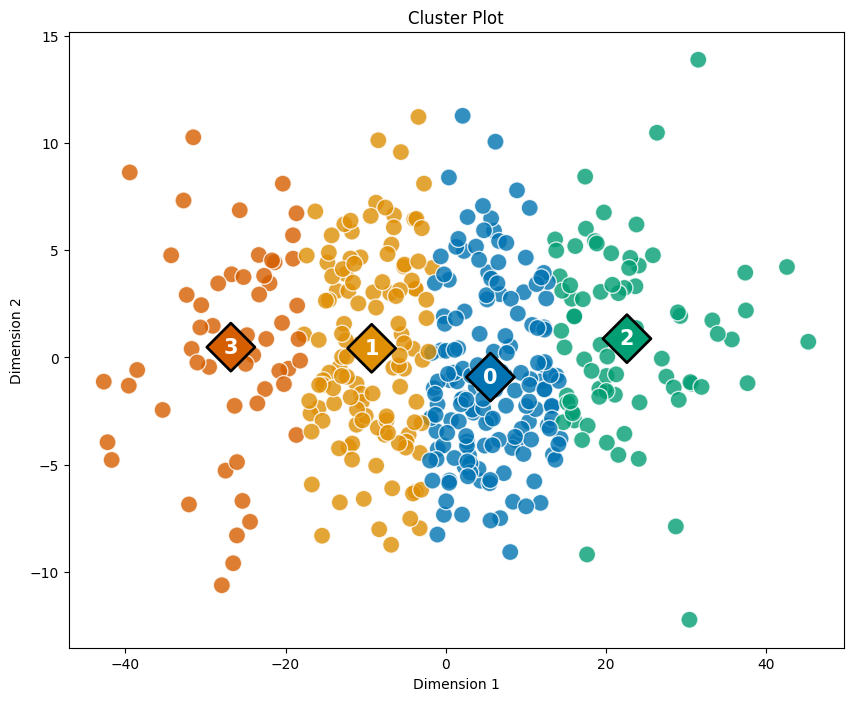

In [319]:
plt.figure(figsize=(10, 8))

# Plot the Clusters
ax = sns.scatterplot(data=reduced_data_df,
                     x='Dimension 1',
                     y='Dimension 2',
                     hue=km.labels_,
                     palette='colorblind',
                     alpha=0.8,
                     s=150,
                     legend=False)

# Plot the Centroids
ax = sns.scatterplot(data=cluster_centers,
                     x='Dimension 1',
                     y='Dimension 2',
                     hue=cluster_centers.index,
                     palette='colorblind',
                     s=600,
                     marker='D',
                     ec='black',
                     legend=False)

# Add centroids Numbers
for i, center in cluster_centers.iterrows():
    plt.text(x=center['Dimension 1'],
             y=center['Dimension 2'],
             s=i,
             horizontalalignment='center',
             verticalalignment='center',
             size=15,
             weight='bold',
             color='white')
    
plt.title('Cluster Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


## Choose the right number of Clusters

### 1.WCSS Method

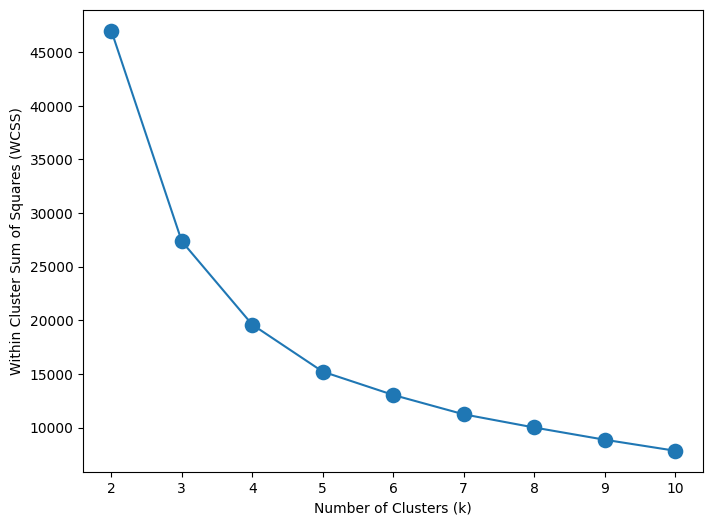

In [320]:
import os

# Set the environment variable
#In the OpenMP framework, OMP_NUM_THREADS is an environment variable that controls the number of threads a program should use for parallel execution. 
#By setting it to '1', you are essentially instructing the program to use only one thread for parallel operations. 
#This can be useful in situations where you want to limit the parallelism, 
#perhaps for debugging purposes or to avoid excessive resource consumption.

os.environ['OMP_NUM_THREADS'] = '1'  

wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(reduced_data_df)
    wcss.append(km.inertia_) #WCSS value for each k 

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

### 2.The Average Silhouette Score

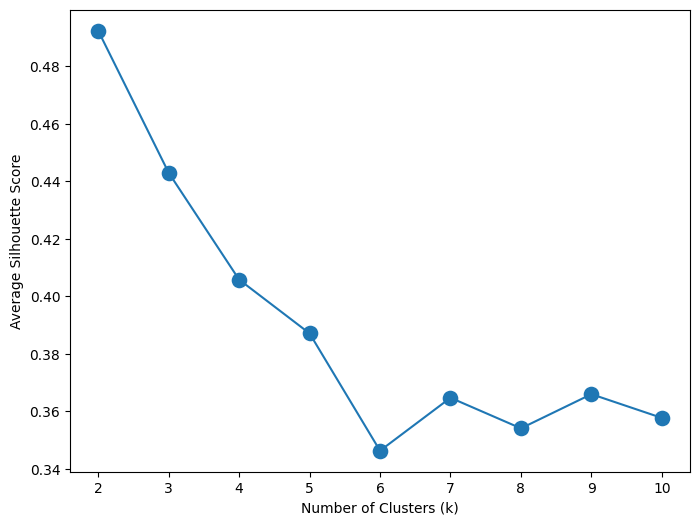

In [321]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(reduced_data_df)
    silhouette.append(silhouette_score(reduced_data_df, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

### Observation of Average Silhouette Score and Within-Cluster Sum of Squares (WCSS) might not be strongly correlated

### 3.The Calinski Harabasz Score

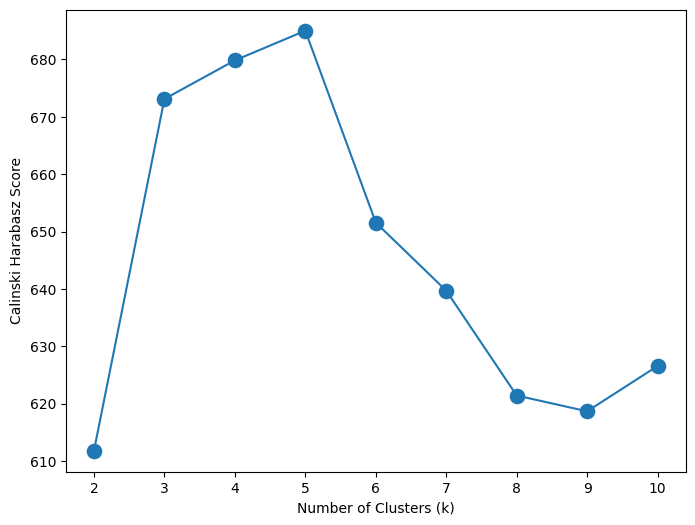

In [322]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(reduced_data_df)
    calinski.append(calinski_harabasz_score(reduced_data_df, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

# Analyze and Interpret the Clusters

In [323]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234) #n_init is arguments to run in times

In [324]:
km.fit(reduced_data_df)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [325]:
cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['Dimension 1', 'Dimension 2']) 
cluster_centers

,Dimension 1,Dimension 2
0,27.894840,1.024546
1,-11.503782,0.628010
2,1.320074,-0.667419
3,-28.141280,0.232246
4,13.295927,-0.315442


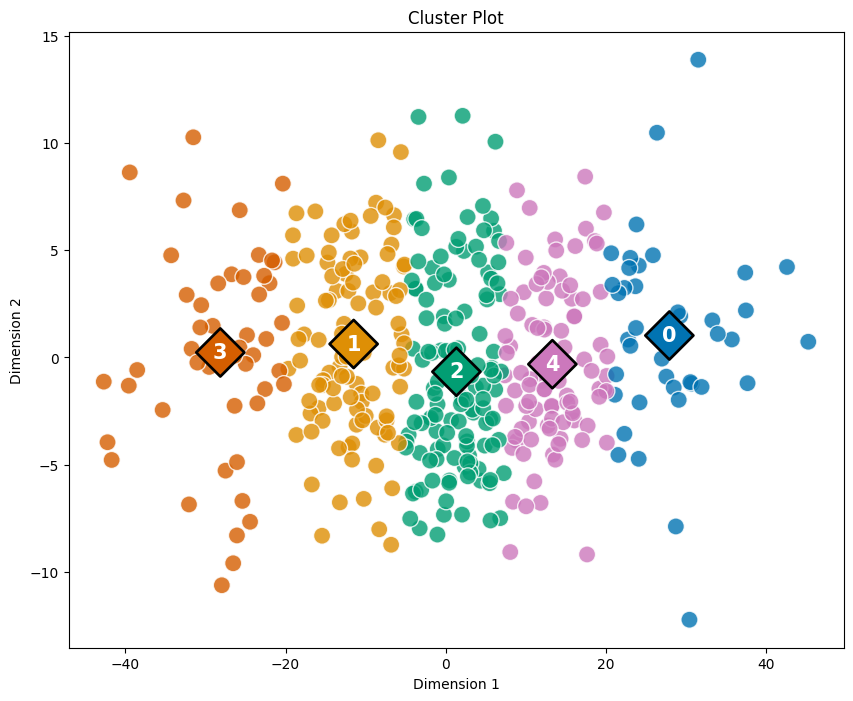

In [326]:
plt.figure(figsize=(10, 8))

# Plot the Clusters
ax = sns.scatterplot(data=reduced_data_df,
                     x='Dimension 1',
                     y='Dimension 2',
                     hue=km.labels_,
                     palette='colorblind',
                     alpha=0.8,
                     s=150,
                     legend=False)

# Plot the Centroids
ax = sns.scatterplot(data=cluster_centers,
                     x='Dimension 1',
                     y='Dimension 2',
                     hue=cluster_centers.index,
                     palette='colorblind',
                     s=600,
                     marker='D',
                     ec='black',
                     legend=False)

# Add centroids Numbers
for i, center in cluster_centers.iterrows():
    plt.text(x=center['Dimension 1'],
             y=center['Dimension 2'],
             s=i,
             horizontalalignment='center',
             verticalalignment='center',
             size=15,
             weight='bold',
             color='white')
    
plt.title('Cluster Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

### Data Recovery : Inverse Transformation

In [327]:
from scipy.special import inv_boxcox

# Dictionary containing lambda values for each feature
lambda_values = {
    'Fresh': 0.29439123289326263,
    'Milk': 0.06626945774945416,
    'Grocery': 0.12374213312064684,
    'Frozen': 0.08797998133217468,
    'Detergents_Paper': 0.055398831547407816,
    'Delicassen': 0.18541105095517926
}

# Create an empty DataFrame to store the inverse-transformed data
inverse_transformed_df = pd.DataFrame()

# Inverse transform each feature in good_data
for feature in good_data.columns:
    # Apply the inverse Box-Cox transform
    inverse_transformed_data = inv_boxcox(good_data[feature], lambda_values.get(feature, None))
    inverse_transformed_df[feature] = inverse_transformed_data

display(inverse_transformed_df)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12670.0,9657.0,7562.0,215.0,2675.0,1339.0
1,7058.0,9811.0,9569.0,1763.0,3294.0,1777.0
2,6354.0,8809.0,7685.0,2406.0,3517.0,7845.0
3,13266.0,1197.0,4222.0,6405.0,508.0,1789.0
4,22616.0,5411.0,7199.0,3916.0,1778.0,5186.0
...,...,...,...,...,...,...
413,29704.0,12052.0,16028.0,13136.0,183.0,2205.0
414,39229.0,1432.0,765.0,4511.0,94.0,2347.0
415,14532.0,15489.0,30244.0,438.0,14842.0,1868.0
416,10291.0,1982.0,2233.0,1039.0,169.0,2126.0


In [328]:
inverse_transformed_df['Total_Spending_Score'] = inverse_transformed_df.sum(axis=1)

display(inverse_transformed_df)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending_Score
0,12670.0,9657.0,7562.0,215.0,2675.0,1339.0,34118.0
1,7058.0,9811.0,9569.0,1763.0,3294.0,1777.0,33272.0
2,6354.0,8809.0,7685.0,2406.0,3517.0,7845.0,36616.0
3,13266.0,1197.0,4222.0,6405.0,508.0,1789.0,27387.0
4,22616.0,5411.0,7199.0,3916.0,1778.0,5186.0,46106.0
...,...,...,...,...,...,...,...
413,29704.0,12052.0,16028.0,13136.0,183.0,2205.0,73308.0
414,39229.0,1432.0,765.0,4511.0,94.0,2347.0,48378.0
415,14532.0,15489.0,30244.0,438.0,14842.0,1868.0,77413.0
416,10291.0,1982.0,2233.0,1039.0,169.0,2126.0,17840.0


In [329]:
inverse_transformed_df['Cluster'] = km.labels_.tolist()
inverse_transformed_df.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending_Score,Cluster
0,12670.0,9657.0,7562.0,215.0,2675.0,1339.0,34118.0,2
1,7058.0,9811.0,9569.0,1763.0,3294.0,1777.0,33272.0,2
2,6354.0,8809.0,7685.0,2406.0,3517.0,7845.0,36616.0,2
3,13266.0,1197.0,4222.0,6405.0,508.0,1789.0,27387.0,4
4,22616.0,5411.0,7199.0,3916.0,1778.0,5186.0,46106.0,4
5,9414.0,8260.0,5127.0,667.0,1796.0,1452.0,26716.0,2
6,12127.0,3200.0,6976.0,481.0,3141.0,546.0,26471.0,2
7,7580.0,4957.0,9427.0,1670.0,3322.0,2567.0,29523.0,2
8,5964.0,3649.0,6193.0,426.0,1717.0,751.0,18700.0,2
9,6007.0,11094.0,18882.0,1160.0,7426.0,2099.0,46668.0,2


- Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

#### Spending scores of cluster centers feature wise

In [330]:
from scipy.special import inv_boxcox

#Inverse transform the centers
boxcox_feature_space = pca.inverse_transform(cluster_centers)

display(boxcox_feature_space)

from scipy.special import inv_boxcox

lambda_values = {
    'Fresh': 0.29439123289326263,
    'Milk': 0.06626945774945416,
    'Grocery': 0.12374213312064684,
    'Frozen': 0.08797998133217468,
    'Detergents_Paper': 0.055398831547407816,
    'Delicassen': 0.18541105095517926
}

original_feature_space_centers = np.column_stack([
    inv_boxcox(boxcox_feature_space[:, i], lambda_values[key])
    for i, key in enumerate(lambda_values.keys())
])

display(original_feature_space_centers)

array([[72.22949042, 10.8334803 , 14.77586661, 11.88055348,  7.84856205,
        15.58867247],
       [32.96539479, 11.05917259, 15.68318104,  9.79110045,  8.95797834,
        13.5225966 ],
       [45.74091542, 10.51128463, 14.58144036, 10.4721275 ,  8.01790157,
        13.29033557],
       [16.38397596, 11.07844045, 15.93707861,  8.90890227,  9.33367469,
        12.50511247],
       [57.67661553, 10.51976368, 14.43666909, 11.1070995 ,  7.77474419,
        14.06535056]])

array([[37807.22863437,  3517.27581441,  4457.00723997,  3404.19707646,
          676.44916671,  1520.66999296],
       [ 3142.70301066,  4008.80354714,  6104.71735418,  1167.11404723,
         1442.27132472,   869.41664068],
       [ 8739.57475205,  2912.3567287 ,  4159.69896336,  1673.0247434 ,
          760.89557492,   813.3725206 ],
       [  397.33530932,  4053.60934596,  6652.17506102,   719.23405081,
         1850.72766752,   645.23765013],
       [18292.72109051,  2926.945926  ,  3949.75312959,  2317.30326334,
          642.48000972,  1012.72134341]])

In [343]:
import pandas as pd

# Convert customer.std() to a DataFrame and transpose it
customer_std_df = pd.DataFrame(customer.std(), columns=['Std']).T

display(customer_std_df)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,37807.228634,3517.275814,4457.007240,3404.197076,676.449167,1520.669993
1,3142.703011,4008.803547,6104.717354,1167.114047,1442.271325,869.416641
2,8739.574752,2912.356729,4159.698963,1673.024743,760.895575,813.372521
3,397.335309,4053.609346,6652.175061,719.234051,1850.727668,645.237650
4,18292.721091,2926.945926,3949.753130,2317.303263,642.480010,1012.721343


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


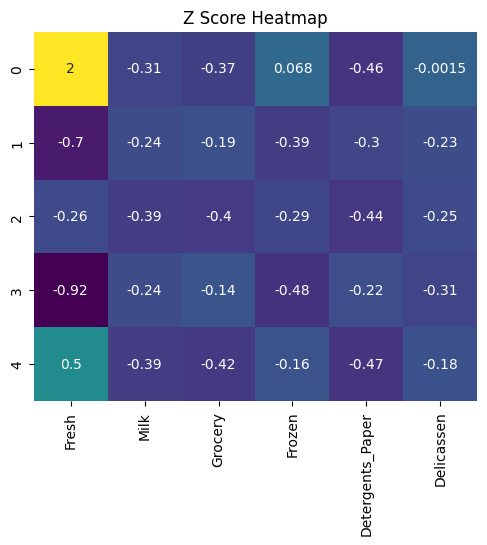

In [346]:
import seaborn as sns
import pandas as pd

# Convert the 2D array to a DataFrame
original_feature_space_centers_df = pd.DataFrame(original_feature_space_centers, columns=lambda_values.keys())

display(original_feature_space_centers_df)

customer_mean_df = pd.DataFrame(customer.mean(), columns=['Mean']).T
display(customer_mean_df)

# Z score comparison
# Compute the standardized difference between original_feature_space_centers_df and customer mean
standardized_diff = (original_feature_space_centers_df - customer_mean_df.iloc[0, :]) / customer_std_df.iloc[0, :]

sns.heatmap(standardized_diff, annot=True, cbar=False, square=True, cmap='viridis')
plt.title('Z Score Heatmap')
plt.show()


- heatmap visually represents the Z-score normalized differences between the cluster centers and the mean of the original data for each feature. Positive values indicate that the cluster center is higher than the mean, while negative values indicate that the cluster center is lower than the mean. The annotations provide the actual numeric values for each cell in the heatmap

### Z score Summary 

#### 1.Positive Z-score (> 0):

Indicates that the corresponding feature value in the cluster center is higher than the overall mean.
Higher positive values indicate greater deviation from the mean towards the positive side, suggesting a stronger influence of that feature in the cluster.
These clusters are characterized by higher-than-average values for the specific feature.

#### 2.Negative Z-score (< 0):

Indicates that the corresponding feature value in the cluster center is lower than the overall mean.
Lower negative values indicate greater deviation from the mean towards the negative side, suggesting a stronger influence of that feature in the cluster.
These clusters are characterized by lower-than-average values for the specific feature.

#### 3.Z-score close to zero:

Indicates that the corresponding feature value in the cluster center is close to the overall mean.
Values around zero suggest that the feature does not significantly contribute to the difference between the cluster center and the mean.

## Predict the cluster on my sample data 

In [350]:
import pandas as pd
from scipy.stats import boxcox

# Define the lambda values
lambda_values = {
    'Fresh': 0.29439123289326263,
    'Milk': 0.06626945774945416,
    'Grocery': 0.12374213312064684,
    'Frozen': 0.08797998133217468,
    'Detergents_Paper': 0.055398831547407816,
    'Delicassen': 0.18541105095517926
}

# Select the sample
samples = pd.DataFrame(customer.loc[indices], columns=customer.keys()).reset_index(drop=True)

# Apply Box-Cox transformation using lambda values
for feature, lam in lambda_values.items():
    samples[feature] = boxcox(samples[feature] + 1, lmbda=lam)

display(samples)


## Predicting the clusters on samples to test how it works

pca = PCA(n_components=2).fit(samples)
pca_samples= pca.transform(samples)

pca_samples_df = pd.DataFrame(pca_samples, columns=['Dimension 1', 'Dimension 2'])

sample_preds_clusters = km.predict(pca_samples_df)

display(sample_preds_clusters)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,52.164618,9.046366,14.623169,13.209915,7.440912,16.230491
1,67.063460,11.368420,16.225972,13.115562,6.966863,14.312300
2,45.451579,11.438168,23.901037,6.099405,14.329252,14.736642


array([2, 1, 4])

## Use case of these clustering projects

 ### Case :
The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*


### Answer :



- Step 1--> Delivery Service Change Hypothesis:

Formulate hypotheses about how each cluster might react to a change in delivery service. For example, one cluster might prefer more frequent deliveries, while another may prioritize cost savings over frequency.



- Step 2 --> Implement Delivery Service Change:

Based on the hypotheses, implement the change in delivery service for a subset of clusters (treatment clusters) while maintaining the existing service for other clusters (control clusters).

- Step 3 --> Analyze Cluster-Specific Impact:

Analyze the impact of the delivery service change within each cluster separately. This involves comparing the performance metrics of the treatment clusters with the control clusters.

- Step 4 --> Decision Making:

Based on the cluster-specific results, make informed decisions about whether to roll out the changed delivery service to the entire cluster or make adjustments based on the observed impact.

### Conclusion on K-Means 
- Using K-means clusters allows to tailor the approach to different customer segments, ensuring that changes in services are more aligned with the preferences and needs of specific groups. It's a way to achieve a more targeted and personalized strategy based on the identified customer clusters.